<a href="https://colab.research.google.com/github/puttipongyy/BSC_DPDM23/blob/main/Classification_proj_DPDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import association_rules

In [186]:
from sklearn import tree
import matplotlib.pyplot as plt

In [187]:
#  pip install --upgrade ipykernel

In [188]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [189]:
survey = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/Project_data/dataset_consumer-insight-survey2019.xlsx')


# Clean data

In [190]:
dirty_data = survey.copy()
dirty_data

,id,a1,a2,a301,a302,a3021,a4,a5,a51,a52,...,u19new,r20new,s20new,t20new,u20new,G_genZ,G_genY,G_genX,G_genB,Gen_group
0,1,1,2530,2,6.0,NaN,2,7,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
1,2,2,2529,2,6.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
2,3,2,2531,2,6.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,2.0,NaN,NaN,2
3,4,2,2516,2,5.0,NaN,2,2,NaN,6.0,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
4,5,2,2508,2,1.0,NaN,2,6,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2044,2,2524,2,3.0,NaN,2,7,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
2055,2045,1,2498,2,1.0,NaN,2,6,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,4.0,4
2056,2046,2,2517,2,3.0,NaN,2,4,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3
2057,2047,1,2511,2,6.0,NaN,2,2,NaN,NaN,...,0,0,0,0,0,NaN,NaN,3.0,NaN,3


In [191]:
use_column = ['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'r1', 'r2', 'r3', 'r4', 'r5','rr1', 'a1','a5','a6', 'a81', 'a91', 'J5new', 'v1' ,'x1', 'x2','x3','x4', 'Gen_group', 'q1']

In [192]:
be_clean_data = dirty_data[use_column]

In [193]:
be_clean_data.describe()

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,...,a81,a91,J5new,v1,x1,x2,x3,x4,Gen_group,q1
count,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,...,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.00000
mean,0.057795,0.322487,0.105391,0.154930,0.145702,0.218067,0.542496,0.246722,0.008256,0.157358,...,2.726566,2.590092,1.457989,2.180670,0.161729,0.050024,0.022827,0.101020,2.516270,23.14473
std,0.233412,0.467542,0.307131,0.361925,0.352893,0.413033,0.498312,0.431208,0.090511,0.364226,...,1.570045,1.334676,1.092228,1.838577,0.368291,0.218048,0.149387,0.301428,1.098237,40.48163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.00000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,5.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,5.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,4.000000,99.00000


In [194]:
be_clean_data.loc[(be_clean_data['q1'] != 1), 'q1'] = 0

In [195]:
be_clean_data['r2'] = be_clean_data['r2'].replace({21: 99, 80: 99})
be_clean_data['r3'] = be_clean_data['r3'].replace({31: 99})

/tmp/ipykernel_4344/247663279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  be_clean_data['r2'] = be_clean_data['r2'].replace({21: 99, 80: 99})
/tmp/ipykernel_4344/247663279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  be_clean_data['r3'] = be_clean_data['r3'].replace({31: 99})


## ให้รายได้ของนักเรียนนักศึกษา เป็นกลุ่ม น้อยกว่า 18000

In [196]:
be_clean_data.loc[(be_clean_data['a5']==5), 'a6'] = 1

In [197]:
be_clean_data.loc[(be_clean_data['a5']==5), 'a6'] = 1

In [198]:
be_clean_data.loc[(be_clean_data['J5new']==0), 'J5new'] = 9

แก้ให้ค่า 9 เป็น nan เพื่อให้ใช้ drop ข้อมูลได้

In [199]:
be_clean_data.loc[(be_clean_data['a5']==9)] = np.nan

In [200]:
be_clean_data.loc[(be_clean_data['v1']==9)] = np.nan

In [201]:
be_clean_data.loc[(be_clean_data['a6']==9)] = np.nan

In [202]:
be_clean_data.isnull().any()

k1           True
k2           True
k3           True
k4           True
k5           True
k6           True
k7           True
k8           True
k9           True
k10          True
r1           True
r2           True
r3           True
r4           True
r5           True
rr1          True
a1           True
a5           True
a6           True
a81          True
a91          True
J5new        True
v1           True
x1           True
x2           True
x3           True
x4           True
Gen_group    True
q1           True
dtype: bool

## data Volume

In [203]:
len_source = len(be_clean_data)
len_source

2059

## drop na

In [204]:
clean_data = be_clean_data.dropna()

In [205]:
clean_data.isnull().any()

k1           False
k2           False
k3           False
k4           False
k5           False
k6           False
k7           False
k8           False
k9           False
k10          False
r1           False
r2           False
r3           False
r4           False
r5           False
rr1          False
a1           False
a5           False
a6           False
a81          False
a91          False
J5new        False
v1           False
x1           False
x2           False
x3           False
x4           False
Gen_group    False
q1           False
dtype: bool

In [206]:
len_no_na = len(clean_data)
len_no_na

1849

## data lost

In [207]:
data_lost = ((len_source - len_no_na)/len_source)*100
print(data_lost)

10.199125789218066


# ก่อนเอาไปใช้

In [208]:
can_use_data = clean_data.copy()

In [209]:
asso_column = ['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'r1', 'r2', 'r3', 'r4', 'r5','rr1']

In [210]:
classi_column = ['a1','a5', 'a81', 'a91', 'J5new', 'v1' ,'x1', 'x2','x3','x4', 'Gen_group', 'q1']

# data for association

In [211]:
asso_data = can_use_data[asso_column].copy()
asso_data

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,r1,r2,r3,r4,r5,rr1
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,3.0,4.0,8.0,10.0,99.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7.0,5.0,3.0,1.0,4.0,99.0
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,4.0,15.0,99.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,4.0,15.0,99.0
5,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,5.0,15.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,15.0,18.0,99.0,99.0,99.0
2055,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,99.0,99.0,99.0,99.0
2056,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,15.0,1.0,18.0,2.0,99.0
2057,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,99.0,99.0,99.0,99.0,99.0


# data for classification

In [212]:
classi_data = can_use_data[classi_column].copy()
classi_data

,a1,a5,a81,a91,J5new,v1,x1,x2,x3,x4,Gen_group,q1
1,2.0,4.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
2,2.0,4.0,1.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0
3,2.0,2.0,1.0,5.0,4.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0
4,2.0,6.0,4.0,5.0,3.0,2.0,1.0,0.0,0.0,0.0,4.0,1.0
5,1.0,2.0,1.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2.0,7.0,6.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0
2055,1.0,6.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0
2056,2.0,4.0,6.0,3.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0,1.0
2057,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0


# Column Rename

In [213]:
classi_data.rename(columns={'a1' : 'gender',
                                  'a5' : 'occupation',
                                  'a81' : 'marital_status',
                                  'a91' : 'region',
                                  'J5new' : 'news_mobile',
                                  'v1' : 'follow_purpose',
                                  'x1' : 'news_home',
                                  'x2' : 'news_office',
                                  'x3' : 'news_vehicle',
                                  'x4' : 'news_everywhere'

                            }, inplace = True)


In [214]:
classi_data

,gender,occupation,marital_status,region,news_mobile,follow_purpose,news_home,news_office,news_vehicle,news_everywhere,Gen_group,q1
1,2.0,4.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
2,2.0,4.0,1.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0
3,2.0,2.0,1.0,5.0,4.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0
4,2.0,6.0,4.0,5.0,3.0,2.0,1.0,0.0,0.0,0.0,4.0,1.0
5,1.0,2.0,1.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2.0,7.0,6.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0
2055,1.0,6.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0
2056,2.0,4.0,6.0,3.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0,1.0
2057,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0


# Classification

# ready for classification

In [215]:
clean_data = classi_data.copy()

#

In [216]:
clean_data

,gender,occupation,marital_status,region,news_mobile,follow_purpose,news_home,news_office,news_vehicle,news_everywhere,Gen_group,q1
1,2.0,4.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
2,2.0,4.0,1.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0
3,2.0,2.0,1.0,5.0,4.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0
4,2.0,6.0,4.0,5.0,3.0,2.0,1.0,0.0,0.0,0.0,4.0,1.0
5,1.0,2.0,1.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2.0,7.0,6.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0
2055,1.0,6.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0
2056,2.0,4.0,6.0,3.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0,1.0
2057,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0


In [217]:
clean_data['marital_status'].describe()

count    1849.000000
mean        2.678204
std         1.555178
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: marital_status, dtype: float64

In [218]:
from sklearn.tree import DecisionTreeClassifier

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [220]:
x_data = clean_data.iloc[:, :-1]
y_data = clean_data.iloc[:, -1]

In [221]:
x_data

,gender,occupation,marital_status,region,news_mobile,follow_purpose,news_home,news_office,news_vehicle,news_everywhere,Gen_group
1,2.0,4.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0
2,2.0,4.0,1.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0
3,2.0,2.0,1.0,5.0,4.0,2.0,1.0,1.0,1.0,1.0,3.0
4,2.0,6.0,4.0,5.0,3.0,2.0,1.0,0.0,0.0,0.0,4.0
5,1.0,2.0,1.0,5.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
2054,2.0,7.0,6.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0
2055,1.0,6.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0
2056,2.0,4.0,6.0,3.0,1.0,2.0,1.0,0.0,1.0,1.0,3.0
2057,1.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0


In [222]:
y_data

1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
       ... 
2054    1.0
2055    0.0
2056    1.0
2057    1.0
2058    1.0
Name: q1, Length: 1849, dtype: float64

In [223]:
y_data.value_counts()

1.0    1115
0.0     734
Name: q1, dtype: int64

## ดูสัดส่วนของ y

In [224]:
len_1 = len(y_data[y_data == 1])

In [225]:
len_0 = len(y_data[y_data == 0])

In [226]:
len_1/len(y_data)

0.6030286641427799

In [227]:
len_0/len(y_data)

0.3969713358572201

# Model selection

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
 X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

In [230]:
X_train

,gender,occupation,marital_status,region,news_mobile,follow_purpose,news_home,news_office,news_vehicle,news_everywhere,Gen_group
1720,2.0,5.0,1.0,5.0,9.0,2.0,0.0,0.0,0.0,0.0,1.0
753,2.0,6.0,4.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,4.0
463,2.0,5.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
1025,1.0,2.0,3.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0
1620,1.0,3.0,4.0,4.0,1.0,3.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
906,1.0,5.0,1.0,1.0,9.0,2.0,0.0,0.0,0.0,0.0,2.0
1335,1.0,1.0,6.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,3.0
1813,2.0,3.0,4.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,4.0
618,2.0,5.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0


In [231]:
y_test

1629    1.0
1461    1.0
1741    1.0
1670    0.0
20      1.0
       ... 
1191    0.0
1251    1.0
1543    0.0
1423    1.0
1244    1.0
Name: q1, Length: 370, dtype: float64

In [232]:
y_test[y_test == 1]

1629    1.0
1461    1.0
1741    1.0
20      1.0
399     1.0
       ... 
1181    1.0
1210    1.0
1251    1.0
1423    1.0
1244    1.0
Name: q1, Length: 227, dtype: float64

In [233]:
len(y_test[y_test == 1])/len(y_test)

0.6135135135135135

In [234]:
from sklearn.model_selection import KFold

In [235]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter

# KFold

In [236]:
kf = KFold(n_splits=10, random_state=7, shuffle=True)

In [237]:
xk = enumerate(kf.split(X_train))

In [238]:
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Train: length={len(train_index)}")
    print(f"  Test:  index={test_index}")
    print(f"  Test: length={len(test_index)}")

Fold 0:
  Train: index=[   0    1    2 ... 1476 1477 1478]
  Train: length=1331
  Test:  index=[   9   13   17   34   43   58   60   63   71   95   98  101  111  117
  118  127  141  146  167  172  185  186  189  200  204  210  241  259
  263  285  308  313  324  326  340  348  354  361  369  372  378  410
  430  450  451  473  474  484  501  504  541  547  558  564  568  585
  610  630  635  640  643  649  652  656  672  677  698  699  705  712
  717  718  742  760  771  782  809  813  832  857  861  863  870  879
  922  930  935  947  953  954  956  961  967  968  985  990  993 1015
 1017 1023 1027 1034 1038 1039 1067 1082 1109 1113 1117 1131 1137 1139
 1142 1156 1157 1162 1165 1167 1170 1171 1177 1186 1197 1210 1212 1223
 1228 1245 1247 1250 1262 1263 1300 1324 1326 1332 1355 1369 1375 1393
 1396 1408 1411 1412 1427 1436 1463 1470]
  Test: length=148
Fold 1:
  Train: index=[   0    1    2 ... 1475 1476 1477]
  Train: length=1331
  Test:  index=[   4   15   20   24   27   46   51   9

# Dtree

prepare for train and test

In [239]:
from sklearn import tree
import matplotlib.pyplot as plt

In [240]:
np.random.seed(seed=1)

### tree plot

In [241]:
Dtree_tree = DecisionTreeClassifier()

In [242]:
# Dtree_tree = DecisionTreeClassifier(criterion='entropy', max_depth = 13), max_leaf_nodes = 13

In [243]:
Dtree_tree.fit(X_train, y_train)

DecisionTreeClassifier()

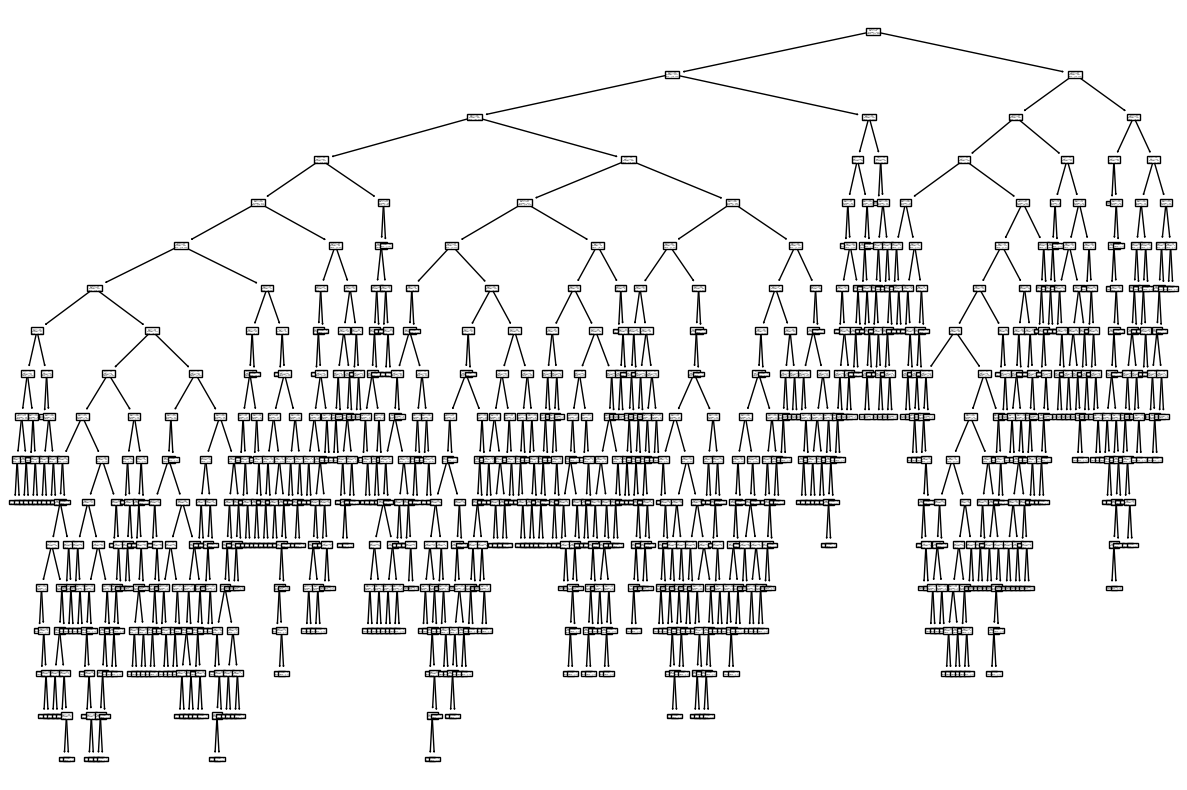

In [244]:
_, ax = plt.subplots(figsize=(15,10))
tree.plot_tree(Dtree_tree);

In [245]:
y_predict = Dtree_tree.predict(X_test)

In [246]:
tree_acc = accuracy_score(y_test, y_predict)

In [247]:
print()
print('-'*50)
print('Accuracy : ', tree_acc)
print('-'*50)


--------------------------------------------------
Accuracy :  0.6837837837837838
--------------------------------------------------


In [248]:
from statistics import stdev

In [249]:
dt_score = cross_val_score(Dtree_tree, X_train, y_train, cv=kf, scoring='accuracy')
dt_cv_score = dt_score.mean()
dt_cv_stdev = stdev(dt_score)
print('Cross Validation Accuracy scores are: {}'.format(dt_score))
print('-'*100)
print('Average Cross Validation Accuracy score: ', dt_cv_score)
print('Cross Validation Accuracy standard deviation: ', dt_cv_stdev)

Cross Validation Accuracy scores are: [0.60135135 0.64864865 0.61486486 0.64864865 0.68243243 0.67567568
 0.63513514 0.65540541 0.64864865 0.63265306]
----------------------------------------------------------------------------------------------------
Average Cross Validation Accuracy score:  0.64434638720353
Cross Validation Accuracy standard deviation:  0.024831019368746876


## Cross validation

# grid_search

In [250]:
from sklearn import tree
import matplotlib.pyplot as plt

Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 3}
Best score: 0.6836045228902371
--------------------------------------------------
--------------------------------------------------
test accuracy :  0.6864864864864865
--------------------------------------------------


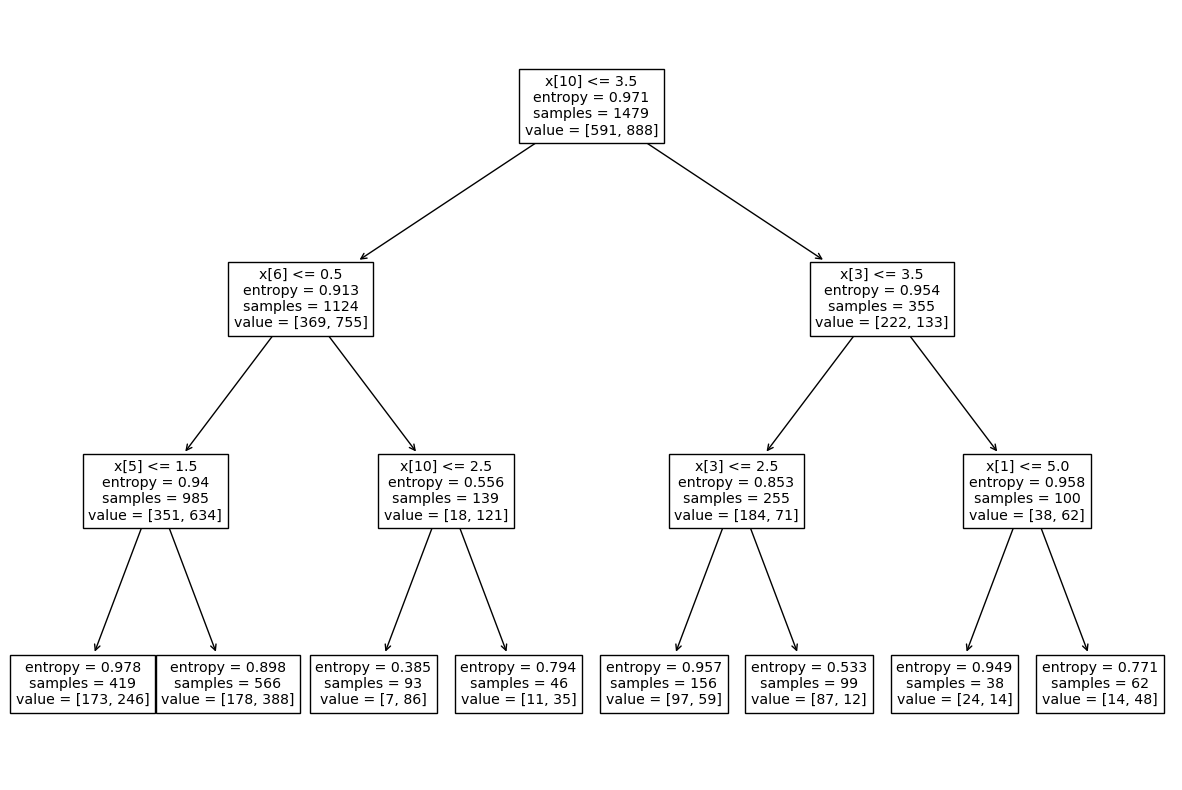

In [251]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7 ,8, 9,10],
    # 'max_leaf_nodes' : [5 , 7,  11, 13, 15, 21],
    'min_samples_split': [ 3,4, 5, 6, 7, 8, 10],
    'min_samples_leaf': [ 1, 2, 3, 4, 5,  7],
    'max_features': [None, 'sqrt'],
    'criterion': ['gini', 'entropy']
    # ,    # 'random_state' : [1]
}

# Create decision tree classifier
clf = DecisionTreeClassifier(random_state = 7)

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv = kf, scoring= 'accuracy' , n_jobs = -1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print('-'*50)

# test decison tree
best_param = grid_search.best_params_
Dtree_grid_best = DecisionTreeClassifier(criterion = best_param['criterion'],
                                         max_depth = best_param['max_depth'],
                                         max_features = best_param['max_features'],
                                        #  max_leaf_nodes = best_param['max_leaf_nodes'],
                                         min_samples_leaf = best_param['min_samples_leaf'],
                                         min_samples_split = best_param['min_samples_split']
                                        #  ,random_state = best_param['random_state']
                                         )

Dtree_grid_best.fit(X_train,y_train)

_, ax = plt.subplots(figsize=(15,10))
tree.plot_tree(Dtree_grid_best);

y_grid_best_predict = Dtree_grid_best.predict(X_test)

acc = accuracy_score(y_test, y_grid_best_predict)

print('-'*50)
print('test accuracy : ', acc)
print('-'*50)


In [252]:
acc = accuracy_score(y_test, y_grid_best_predict)

In [253]:
acc

0.6864864864864865

## Validation

In [254]:
y_pred = Dtree_grid_best.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print('-'*100)
print(classification_report(y_test, y_pred))

accuracy = 0.6864864864864865
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.67      0.37      0.48       143
         1.0       0.69      0.89      0.78       227

    accuracy                           0.69       370
   macro avg       0.68      0.63      0.63       370
weighted avg       0.68      0.69      0.66       370



In [255]:
from statistics import stdev
score = cross_val_score(Dtree_grid_best, X_train, y_train, cv=kf, scoring='accuracy')
dt_cv_score = score.mean()
dt_cv_stdev = stdev(score)
print('Cross Validation Accuracy scores are: {}'.format(score))
print('-'*100)
print('Average Cross Validation Accuracy score: ', dt_cv_score)
print('Cross Validation Accuracy standard deviation: ', dt_cv_stdev)

Cross Validation Accuracy scores are: [0.63513514 0.69594595 0.62837838 0.62837838 0.70945946 0.71621622
 0.66216216 0.70945946 0.71621622 0.73469388]
----------------------------------------------------------------------------------------------------
Average Cross Validation Accuracy score:  0.6836045228902371
Cross Validation Accuracy standard deviation:  0.04100859518863015


In [267]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
cm = confusion_matrix(y_test, y_pred)

dt_Recall = recall_score(y_test, y_pred)
dt_Precision = precision_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)
dt_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[ 53  90]
 [ 26 201]]


In [257]:
dt_Recall

0.8854625550660793

In [258]:
dt_Precision

0.6907216494845361

In [259]:
dt_f1

0.7760617760617761

In [260]:
dt_accuracy

0.6864864864864865

## Visualize Dtree

In [261]:
# pip install graphviz

In [262]:
# pip install pydotplus

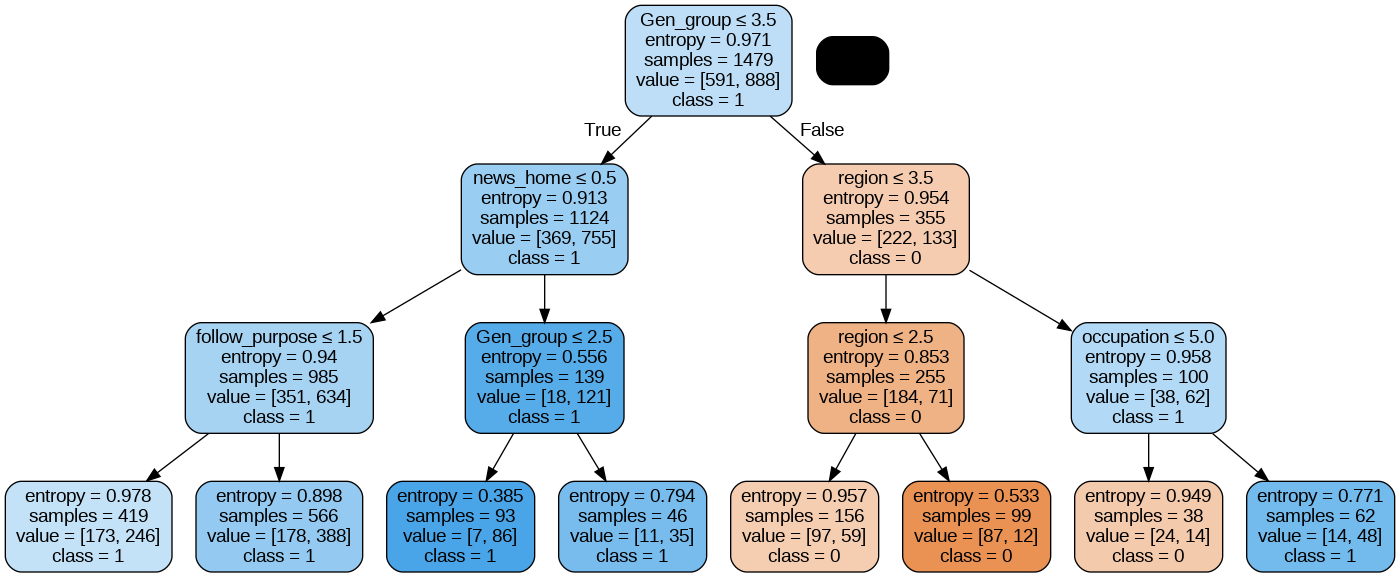

In [263]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(Dtree_grid_best,  out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = classi_data.columns[:-1],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# graph.write_png('diabetes.png')
Image(graph.create_png())

In [264]:
best_param = grid_search.best_params_
best_param

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 7,
 'min_samples_split': 3}

# evaluate feature

In [265]:
Dtree_grid_best.feature_importances_

array([0.        , 0.07500254, 0.        , 0.25692482, 0.        ,
       0.04586372, 0.14816994, 0.        , 0.        , 0.        ,
       0.47403898])

In [266]:
feature = pd.Series(Dtree_grid_best.feature_importances_,index= X_test.columns).sort_values(ascending = True)

In [184]:
feature

เพศ                             0.000000
สถานภาพส่วนตัว                  0.000000
ติดตามข่าวผ่านมือถือ            0.000000
มักติดตามข่าวที่สถานที่ทำงาน    0.000000
มักติดตามข่าวบนยานพาหะ          0.000000
มักติดตามข่าวไม่จำกัดสถานที่    0.000000
ติดตามข่าวแบบใดมากที่สุด        0.045864
อาชีพ                           0.075003
มักติดตามข่าวที่บ้าน            0.148170
ภูมิภาคที่อาศัย                 0.256925
Gen_group                       0.474039
dtype: float64

## good feature

In [157]:
# good_feature = ["a5","a81","x4","x2"]

In [158]:
# x_new = x_data[good_feature ]

KeyError: "None of [Index(['a5', 'a81', 'x4', 'x2'], dtype='object')] are in the [columns]"

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(x_new, y_data, test_size=0.2, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7 ,8, 9,10],
    # 'max_leaf_nodes' : [5 , 7,  11, 13, 15, 21],
    'min_samples_split': [ 3,4, 5, 6, 7, 8, 10],
    'min_samples_leaf': [ 1, 2, 3, 4, 5,  7],
    'max_features': [None, 'sqrt'],
    'criterion': ['gini', 'entropy']
    # ,    # 'random_state' : [1]
}

# Create decision tree classifier
clf = DecisionTreeClassifier(random_state = 7)

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv = kf, scoring= 'accuracy' , n_jobs = -1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print('-'*50)

# test decison tree
best_param = grid_search.best_params_
Dtree_grid_best = DecisionTreeClassifier(criterion = best_param['criterion'],
                                         max_depth = best_param['max_depth'],
                                         max_features = best_param['max_features'],
                                        #  max_leaf_nodes = best_param['max_leaf_nodes'],
                                         min_samples_leaf = best_param['min_samples_leaf'],
                                         min_samples_split = best_param['min_samples_split']
                                        #  ,random_state = best_param['random_state']
                                         )

Dtree_grid_best.fit(X_train,y_train)

_, ax = plt.subplots(figsize=(15,10))
tree.plot_tree(Dtree_grid_best);

y_grid_best_predict = Dtree_grid_best.predict(X_test)

acc = accuracy_score(y_test, y_grid_best_predict)

print('-'*50)
print('test accuracy : ', acc)
print('-'*50)


In [ ]:
acc = accuracy_score(y_test, y_grid_best_predict)

In [ ]:
acc

## Validation

In [159]:
y_pred = Dtree_grid_best.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print('-'*100)
print(classification_report(y_test, y_pred))

accuracy = 0.6864864864864865
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.67      0.37      0.48       143
         1.0       0.69      0.89      0.78       227

    accuracy                           0.69       370
   macro avg       0.68      0.63      0.63       370
weighted avg       0.68      0.69      0.66       370



In [160]:
from statistics import stdev
score = cross_val_score(Dtree_grid_best, X_train, y_train, cv=kf, scoring='accuracy')
dt_cv_score = score.mean()
dt_cv_stdev = stdev(score)
print('Cross Validation Accuracy scores are: {}'.format(score))
print('-'*100)
print('Average Cross Validation Accuracy score: ', dt_cv_score)
print('Cross Validation Accuracy standard deviation: ', dt_cv_stdev)

Cross Validation Accuracy scores are: [0.63513514 0.69594595 0.62837838 0.62837838 0.70945946 0.71621622
 0.66216216 0.70945946 0.71621622 0.73469388]
----------------------------------------------------------------------------------------------------
Average Cross Validation Accuracy score:  0.6836045228902371
Cross Validation Accuracy standard deviation:  0.04100859518863015


In [268]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
cm = confusion_matrix(y_test, y_pred)

dt_Recall = recall_score(y_test, y_pred)
dt_Precision = precision_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)
dt_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[ 53  90]
 [ 26 201]]


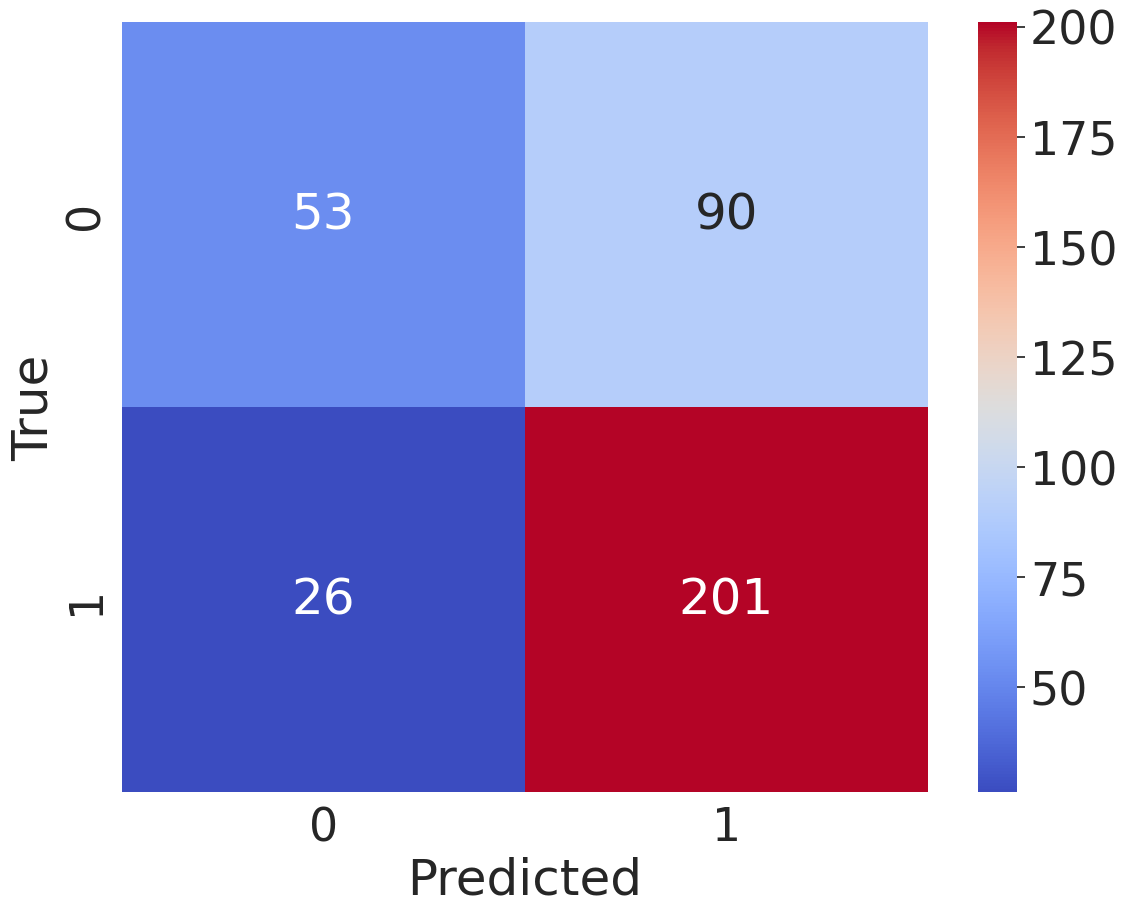

In [285]:
import seaborn as sns

import matplotlib.pyplot as plt
plt.figure(figsize=[13,10])
sns.set(font_scale=3)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [162]:
dt_Recall

0.8854625550660793

In [163]:
dt_Precision

0.6907216494845361

In [164]:
dt_f1

0.7760617760617761

In [165]:
dt_accuracy

0.6864864864864865

# Imbalanced data

In [ ]:
from collections import Counter
from imblearn.under_sampling import EditedNearestNeighbours

# mixed 1
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'), random_state=1)
X_SMOTEENN, y_SMOTEENN = smote_enn.fit_resample(x_data, y_data)
print(sorted(Counter(y_SMOTEENN).items()))

#mixed 2
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=1)
X_SMOTETomek, y_SMOTETomek = smote_tomek.fit_resample(x_data, y_data)
print(sorted(Counter(y_SMOTETomek).items()))

# under



# over





In [ ]:
X_SMOTEENN

In [ ]:
x_data

## Smoteenn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_SMOTEENN, y_SMOTEENN, test_size=0.2, random_state=0)

In [ ]:
# Import
from sklearn.tree import DecisionTreeClassifier


# Define
clf = DecisionTreeClassifier(random_state=1)

# Train
clf.fit(X_train,y_train)

# Predict
y_pred=clf.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred) )

In [ ]:
# from sklearn import tree
# tree.plot_tree(clf);

In [ ]:
# Define the parameter grid to search over
parameters_dt ={
      'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
      'criterion' : ['gini', 'entropy'],

      'min_samples_leaf': [2,3,4,5,7,10],
      'min_samples_split': [2,3,4,5,7,10]}

# Define
clf1 = DecisionTreeClassifier(random_state=1)

# Create a GridSearchCV object with 10-fold cross-validation
grid_dt1 =  GridSearchCV(estimator=clf1,
                           param_grid=parameters_dt,
                           cv=kf, n_jobs=-1,scoring = "accuracy")
# Fit the grid search object to the data // หาพารามิเตอร์ที่ดีที่สุด เเล้วใช้  cross-va

In [ ]:
# Fit the GridSearchCV object to the training data
grid_dt1.fit(X_train, y_train)
# Print the best hyperparameters
print("Best hyperparameters: ", grid_dt1.best_params_)

In [ ]:
print("Best score:", grid_dt1.best_score_)

In [ ]:

# test decison tree
best_param = grid_dt1.best_params_
Dtree_grid_best = DecisionTreeClassifier(criterion = best_param['criterion'],
                                         max_depth = best_param['max_depth'],
                                        #  max_features = best_param['max_features'],
                                        #  max_leaf_nodes = best_param['max_leaf_nodes'],
                                         min_samples_leaf = best_param['min_samples_leaf'],
                                         min_samples_split = best_param['min_samples_split']
                                        #  ,random_state = best_param['random_state']
                                         )

Dtree_grid_best.fit(X_train,y_train)

_, ax = plt.subplots(figsize=(15,10))
tree.plot_tree(Dtree_grid_best);

y_grid_best_predict = Dtree_grid_best.predict(X_test)

acc = accuracy_score(y_test, y_grid_best_predict)

print('-'*50)
print('test accuracy : ', acc)
print('-'*50)

In [ ]:
# Predict
y_pred =  Dtree_grid_best.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred) )

## Smotetomek

In [ ]:
X_SMOTETomek

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_SMOTETomek, y_SMOTETomek, test_size=0.2, random_state=0)

In [ ]:
# Import
from sklearn.tree import DecisionTreeClassifier


# Define
clf = DecisionTreeClassifier(random_state=1)

# Train
clf.fit(X_train,y_train)

# Predict
y_pred=clf.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred) )

In [ ]:
# from sklearn import tree
# tree.plot_tree(clf);

In [ ]:
# Define the parameter grid to search over
parameters_dt ={
      'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
      'criterion' : ['gini', 'entropy'],
      'min_samples_leaf': [2,3,4,5,7,10],
      'min_samples_split': [2,3,4,5,7,10]}

# Define
clf1 = DecisionTreeClassifier(random_state=1)

# Create a GridSearchCV object with 10-fold cross-validation
grid_dt1 =  GridSearchCV(estimator=clf1,
                           param_grid=parameters_dt,
                           cv=10, n_jobs=-1,scoring = "accuracy")
# Fit the grid search object to the data // หาพารามิเตอร์ที่ดีที่สุด เเล้วใช้  cross-va

In [ ]:

# Fit the GridSearchCV object to the training data
grid_dt1.fit(X_train, y_train)
# Print the best hyperparameters
print("Best hyperparameters: ", grid_dt1.best_params_)

In [ ]:
print("Best score:", grid_dt1.best_score_)

In [ ]:

# test decison tree
best_param = grid_dt1.best_params_
Dtree_grid_best = DecisionTreeClassifier(criterion = best_param['criterion'],
                                         max_depth = best_param['max_depth'],
                                        #  max_features = best_param['max_features'],
                                        #  max_leaf_nodes = best_param['max_leaf_nodes'],
                                         min_samples_leaf = best_param['min_samples_leaf'],
                                         min_samples_split = best_param['min_samples_split']
                                        #  ,random_state = best_param['random_state']
                                         )

Dtree_grid_best.fit(X_train,y_train)

_, ax = plt.subplots(figsize=(15,10))
tree.plot_tree(Dtree_grid_best);

y_grid_best_predict = Dtree_grid_best.predict(X_test)

acc = accuracy_score(y_test, y_grid_best_predict)

print('-'*50)
print('test accuracy : ', acc)
print('-'*50)

In [ ]:
# Predict
y_pred =  Dtree_grid_best.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred) )